In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv')
df.head(2)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0


In [3]:
submission = pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv')

In [4]:
submission

,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,0
1,8eaeaf13213eeb16ad879a2a2591bbe5,0
2,dce649b733c153ba5363a0413cac988f,0
3,8a46df0bb997269d6834f9437a4b0a77,0
4,d11d3091e22f1cf3cb865598de197599,0
...,...,...
478028,0e1db3d4b04256f9660f5d276ddf1314,0
478029,0b7f352e58caf0fd1f961e98ef04e89c,0
478030,9b19eff33ddb14e9e68fca2e90379e46,0
478031,8be463fed78f0da63e964706f710332b,0


In [5]:
test = pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv')

In [6]:
test.head(2)

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0


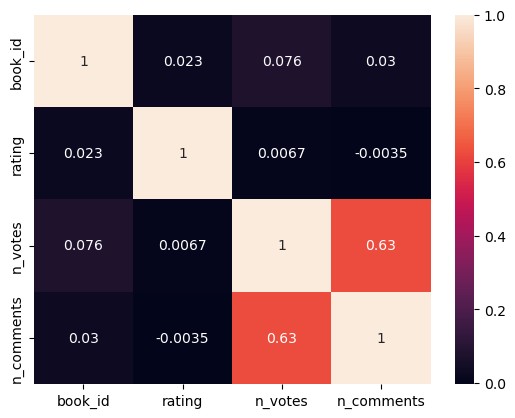

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [9]:
df.date_added = pd.to_datetime(df.date_added, utc=True)

In [10]:
df['DayOfMonth']=df['date_added'].dt.day

In [11]:
df['month'] = df['date_added'].dt.month

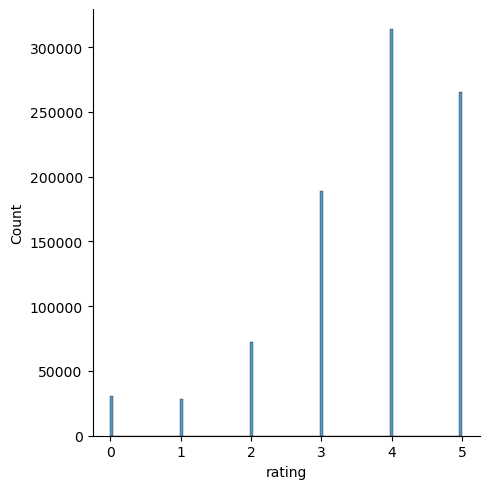

In [12]:
sns.displot(df['rating'], kde=False)
plt.show()

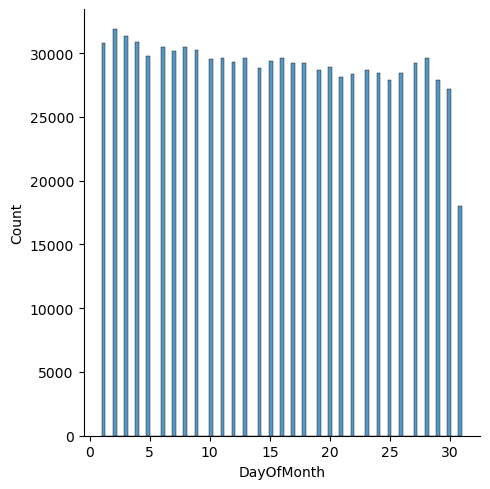

In [13]:
sns.displot(df['DayOfMonth'], kde=False)
plt.show()

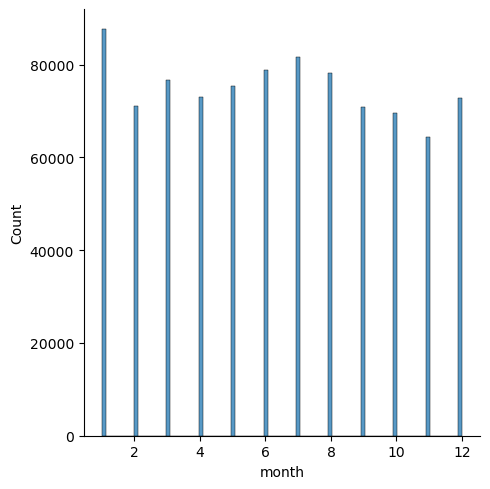

In [14]:
sns.displot(df['month'], kde=False)
plt.show()

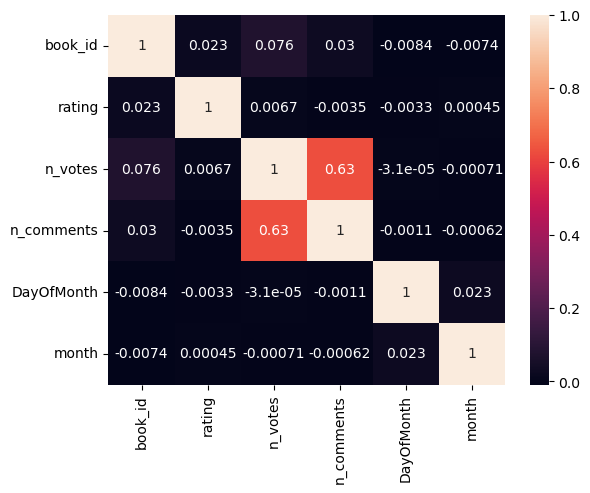

In [15]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='month'>

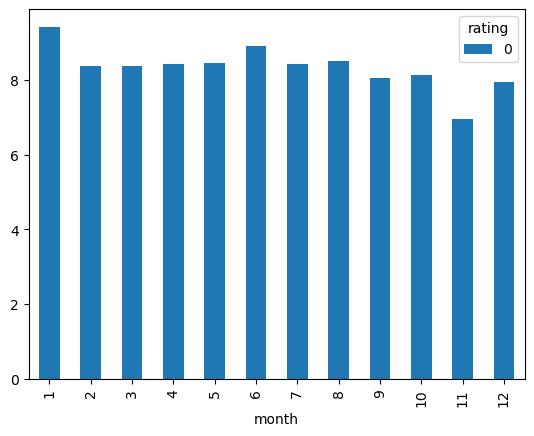

In [16]:
groups = df[df.rating == 0].groupby(['month','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='month'>

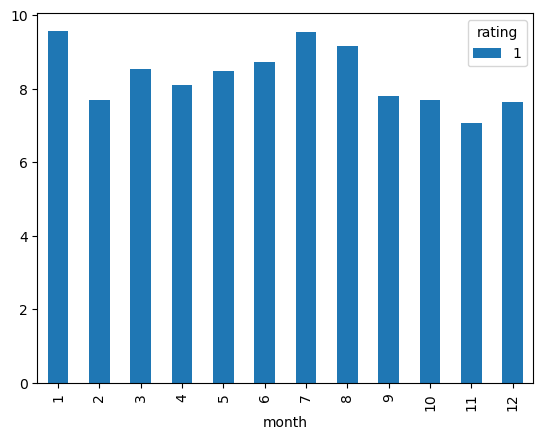

In [17]:
groups = df[df.rating == 1].groupby(['month','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='month'>

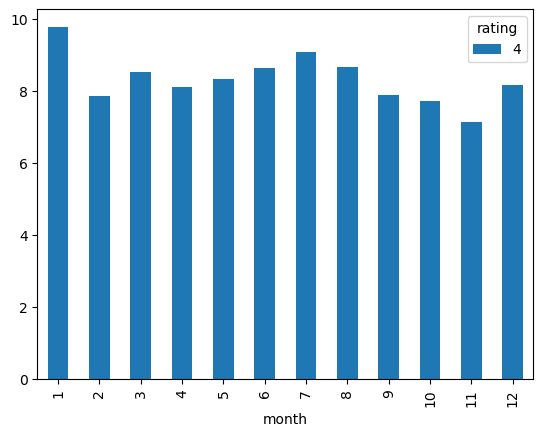

In [18]:
groups = df[df.rating == 4].groupby(['month','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='month'>

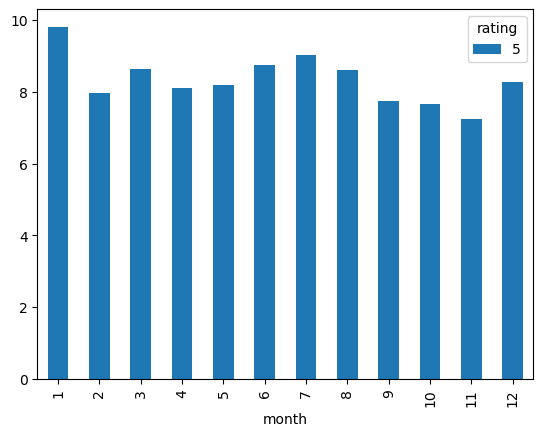

In [19]:
groups = df[df.rating == 5].groupby(['month','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='month'>

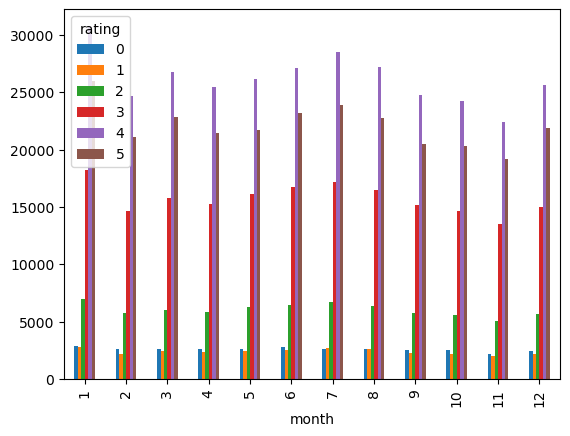

In [20]:
groups = df.groupby(['month','rating']).size().unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

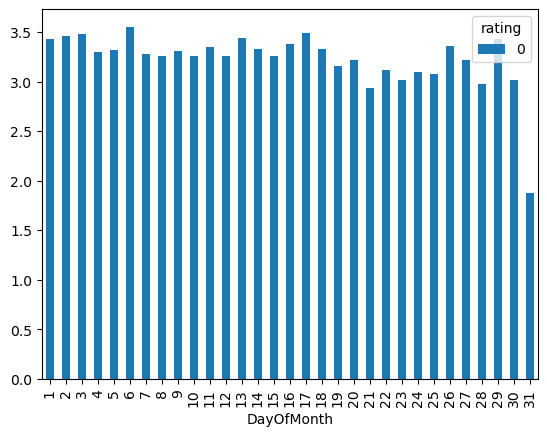

In [21]:
groups = df[df.rating == 0].groupby(['DayOfMonth','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

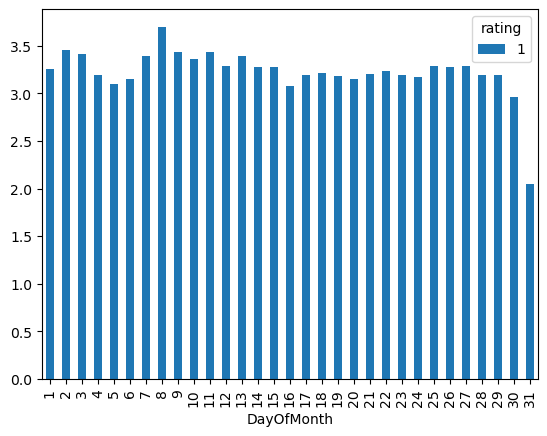

In [22]:
groups = df[df.rating == 1].groupby(['DayOfMonth','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

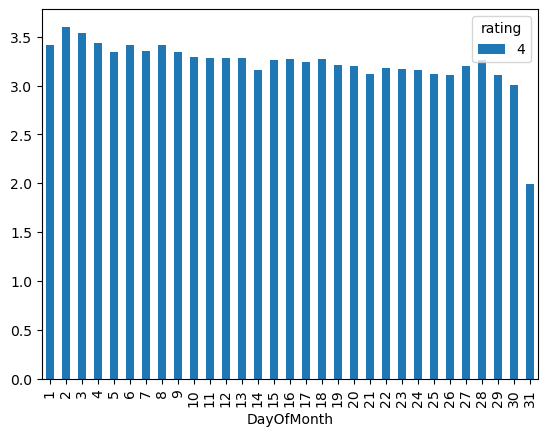

In [23]:
groups = df[df.rating == 4].groupby(['DayOfMonth','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

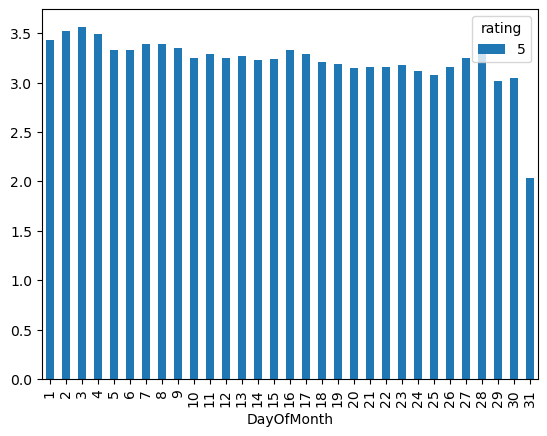

In [24]:
groups = df[df.rating == 5].groupby(['DayOfMonth','rating']).size().transform(lambda x: x*100/sum(x)).unstack(fill_value=0)
groups.plot.bar()

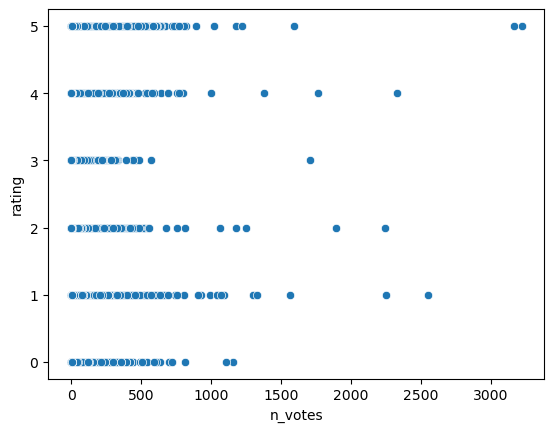

In [25]:
sns.scatterplot(x='n_votes', y='rating', data=df)
plt.show()

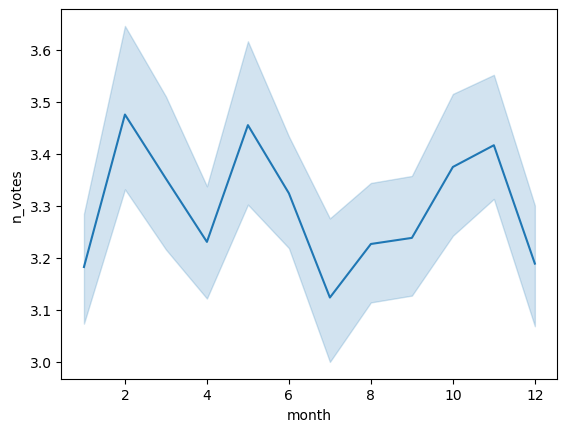

In [26]:
sns.lineplot(x='month', y='n_votes', data=df)
plt.show()

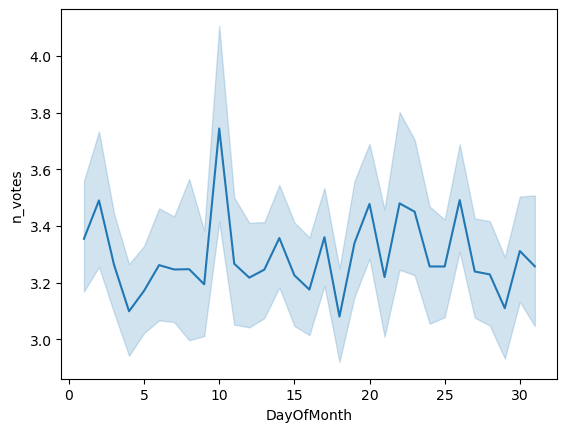

In [27]:
sns.lineplot(x='DayOfMonth', y='n_votes', data=df)
plt.show()